## BoT-IoT 데이터 로드



In [ ]:
# 구글 드라이브 마운트(접근 허용)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 구글 드라이브에서 csv 파일 가져오기

import pandas as pd

# 불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Colab Notebooks/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'

# pandas read_csv로 불러오기
df = pd.read_csv(filename)

In [ ]:
## 컬럼이 최대 20개까지만 보여서 제한 50으로 변경
from google.colab.data_table import DataTable
DataTable.max_columns = 50

In [ ]:
# 데이터 형식
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [ ]:
## 각 컬럼별 데이터 수, 데이터 타입 확인 - 특성 자체도 아예 줄어들어있네요?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [ ]:
## 결측치 존재 여부 확인 - 존재 X
df.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [ ]:
## 수치형 변수 분포 확인
df.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [ ]:
## 타겟 종류 확인
df['category'].unique()

array(['DDoS', 'DoS', 'Reconnaissance', 'Normal', 'Theft'], dtype=object)

In [ ]:
## 속성과 클래스 분리

import numpy as np

data = df[['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max']].to_numpy()  # 특성 논문 참고하여 임의로 선택, 후에 이유 덧붙여서 얘기하기
target = df['category'].to_numpy()  # category: 공격의 종류

In [ ]:
print(data.shape)  # 총 2,934,817개의 데이터, 10개의 특성

(2934817, 10)


## 훈련셋, 테스트셋 나누기

In [ ]:
## 훈련셋 : 테스트셋 = 8 : 2

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

## 데이터 전처리

In [ ]:
## 최소 최대 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_input)

train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

## Decision Tree 모델 훈련 및 평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9971757175598301
0.992118767079412


이미 정확도 매우 높음

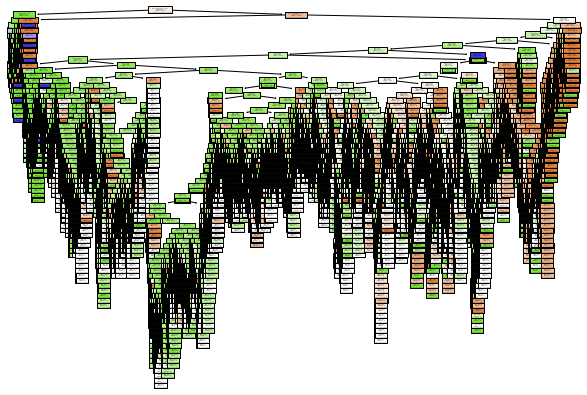

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names=['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max'])
plt.show()
plt.savefig('tree-high_dpi', dpi=100)

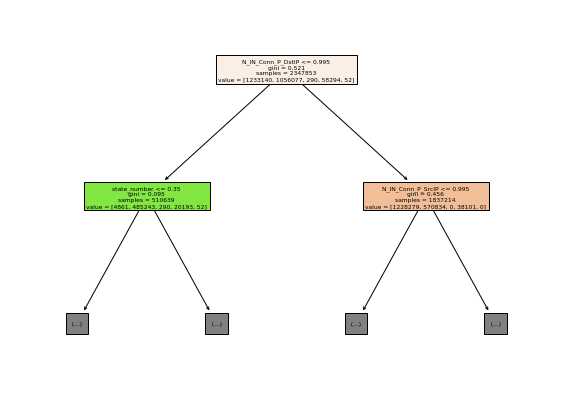

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max'])
plt.show()

## 가지치기 수행

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

## 표준화한 데이터셋 활용 (어차피 각 단계마다 같은 기준을 가지고 비교하기 때문에 표준화하지 않은 데이터셋과 결과 동일)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7981266288817912
0.7986094547536136


수행할 필요가 없긴 한데 한번 시도는 해봄. 깊이 3으로는 턱없이 부족한 결과

## 시각화

In [ ]:
## 각 요소별 중요도 출력
print(dt.feature_importances_)

[0.05981654 0.13992299 0.2810107  0.16412047 0.0841362  0.08607105
 0.08550034 0.00723714 0.03324938 0.05893519]


seq : 0.060
stddev : 0.140
N_IN_Conn_P_DstIP : 0.281
N_IN_Conn_P_SrcIP : 0.164
min : 0.084
state_number : 0.086
mean : 0.086
drate : 0.007
srate : 0.033
max : 0.059


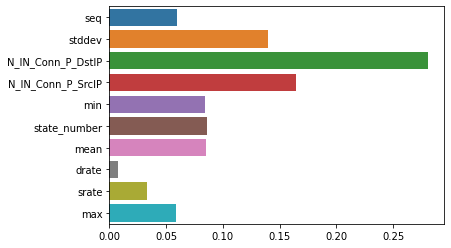

In [ ]:
## 특성 중요도 시각화

import seaborn as sns
import numpy as np
%matplotlib inline

data_df = df[['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max']]
feature_names = data_df.columns.tolist()

# feature별 importance 매핑
for name, value in zip(feature_names , dt.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_, y=feature_names)

가장 중요도가 높은 특성은 N_IN_Conn_P_DstIP이며, 해당 특성은 Destinatione IP당 인바운드 연결 수를 의미한다. 다음으로 중요도가 높았던 특성은 N_INConn_P_SrcIP로, Source IP 당 인바운드 연결 수를 의미한다.

## dtreeviz를 통한 시각화

In [ ]:
## dtreeviz를 통한 시각화
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


참고 링크: https://github.com/parrt/dtreeviz


https://mljar.com/blog/visualize-decision-tree/ 

In [ ]:
# dtreeviz는 y축에 float 타입의 데이터를 넣어야 함.
# -> train_target 데이터를 ['DDoS', 'DoS', Reconnaissance', 'Normal', 'Theft'] -> [1, 2, 3, 4, 5]로 치환

train_target_num = pd.DataFrame(train_target, columns=['category'])
print(train_target_num)

train_target_num['category'] = pd.factorize(train_target_num['category'])[0]+1
print(train_target_num)

train_target_num = train_target_num.to_numpy()
train_target_num = train_target_num.reshape(-1)

        category
0           DDoS
1           DDoS
2            DoS
3           DDoS
4           DDoS
...          ...
2347848     DDoS
2347849     DDoS
2347850     DDoS
2347851      DoS
2347852     DDoS

[2347853 rows x 1 columns]
         category
0               1
1               1
2               2
3               1
4               1
...           ...
2347848         1
2347849         1
2347850         1
2347851         2
2347852         1

[2347853 rows x 1 columns]


* distribution of decision feature in the each node 
* class-color matching legend
* distribution of the class in the leaf 



해보려다가 실패했는데 혹시 나중에 다시 시도해볼수도 있어서 일단 코드 남겨둠

## 하이퍼파라미터 튜닝

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# https://injo.tistory.com/15
# min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
# min_samples_leaf: 리프노드가 되기 위한 최소한의 샘플 데이터 수
# max_features: 최적의 분할을 위해 고려할 최대 feature 개수
# max_depth: 트리의 최대 깊이
# min_impurity_decrease: 노드가 분할하는 데 필요한 불순도 변화의 최솟값

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(1, 30),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 20),
          }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=10, random_state=42)

gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f175af2ad30>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1753eee6d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1755d43790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f175c633280>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 23, 'min_impurity_decrease': 0.00015808361216819946, 'min_samples_leaf': 4, 'min_samples_split': 9}


In [ ]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.9932738634737395


그리드서치로 최적의 모델 탐색 후 테스트셋으로 평가했을 때, 정확도가 약 0.001 정도 증가했다. 이미 성능이 좋았던 모델이라 큰 차이는 없었다.